In [ ]:
!wget https://filetransfer.io/data-package/MgxiuALI/download -O data.zip

--2021-07-11 09:13:05--  https://filetransfer.io/data-package/MgxiuALI/download
Resolving filetransfer.io (filetransfer.io)... 104.21.13.139, 172.67.200.96
Connecting to filetransfer.io (filetransfer.io)|104.21.13.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s25.filetransfer.io/storage/download/r5QPovnlT8vM [following]
--2021-07-11 09:13:05--  https://s25.filetransfer.io/storage/download/r5QPovnlT8vM
Resolving s25.filetransfer.io (s25.filetransfer.io)... 104.21.13.139, 172.67.200.96
Connecting to s25.filetransfer.io (s25.filetransfer.io)|104.21.13.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114561624 (109M) [application/octet-stream]
Saving to: ‘data.zip’

data.zip            100%[===================>] 109.25M  8.35MB/s    in 16s     

2021-07-11 09:13:23 (6.63 MB/s) - ‘data.zip’ saved [114561624/114561624]



In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: sarcasm_test_set.csv    
  inflating: sarcasm_train_set.csv   


In [ ]:
import pandas as pd, numpy as np, re, time
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
train_data = pd.read_csv('sarcasm_train_set.csv')
test_data = pd.read_csv('sarcasm_test_set.csv')

In [ ]:
def clean_text(string):
    # stop_words=['the', 'a', 'and', 'is', 'be', 'will']
    # sw_nltk = stopwords.words('english') 
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    string = re.sub(r'https?://\S+|www\.\S+', '', string)
    string = re.sub(r'<.*?>', '', string)
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 
    string = string.lower()
    string = ' '.join([word for word in string.split() if word not in ENGLISH_STOP_WORDS])
    string = re.sub(r'\s+', ' ', string).strip()

    return string

In [ ]:
train_data['comment'] = train_data['comment'].apply(lambda s: str(s)).apply(clean_text)
train_data['parent_comment'] = train_data['parent_comment'].apply(lambda s: str(s)).apply(clean_text)

In [ ]:
normal_data = train_data[train_data['label'] == 0]
sarcasm_data = train_data[train_data['label'] == 1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


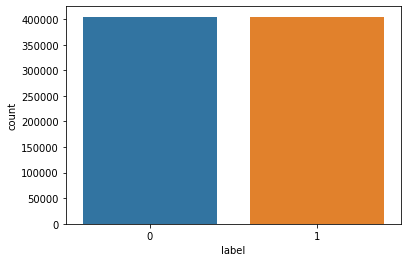

In [ ]:
sns.countplot(train_data['label']);

In [ ]:
normal_data['author'].value_counts()

Biffingston          336
pokemon_fetish       172
NeonDisease          159
ShyBiDude89          156
ivsciguy             138
                    ... 
kaminari1              1
licentiousbuffoon      1
mrhotpotato            1
Loborin                1
lethalcure1            1
Name: author, Length: 219263, dtype: int64

In [ ]:
sarcasm_data['author'].value_counts()

Biffingston       332
NeonDisease       177
pokemon_fetish    172
ShyBiDude89       148
ivsciguy          144
                 ... 
lnuw                1
StretchTucker       1
EDM117              1
AppleDane           1
lethalcure1         1
Name: author, Length: 220805, dtype: int64

In [ ]:
words_normal_data = normal_data['comment'].apply(lambda s: str(s).split())
words_sarcasm_data = sarcasm_data['comment'].apply(lambda s: str(s).split())


In [ ]:
words_normal_data_dict = {}
words_sarcasm_data_dict = {}

for arr in words_normal_data:
  for word in arr:
    words_normal_data_dict[word] = words_normal_data_dict.get(word, 0) + 1

for arr in words_sarcasm_data:
  for word in arr:
    words_sarcasm_data_dict[word] = words_sarcasm_data_dict.get(word, 0) + 1



In [ ]:
words_normal_data_dict = sorted(words_normal_data_dict.items(), key=lambda x: x[1], reverse=True)
words_sarcasm_data_dict = sorted(words_sarcasm_data_dict.items(), key=lambda x: x[1], reverse=True)

In [ ]:
words_normal_data_dict[:50]

[('like', 23715),
 ('just', 22684),
 ('dont', 16681),
 ('im', 14530),
 ('think', 12321),
 ('people', 12194),
 ('thats', 10274),
 ('fuck', 9506),
 ('good', 9432),
 ('know', 9241),
 ('really', 8288),
 ('time', 8097),
 ('youre', 7135),
 ('yeah', 6954),
 ('make', 6632),
 ('did', 6510),
 ('right', 6373),
 ('got', 6192),
 ('game', 5974),
 ('want', 5789),
 ('going', 5605),
 ('sure', 5587),
 ('pretty', 5499),
 ('didnt', 5468),
 ('way', 5450),
 ('say', 5352),
 ('actually', 5275),
 ('better', 5175),
 ('doesnt', 5133),
 ('shit', 4986),
 ('probably', 4960),
 ('need', 4865),
 ('does', 4841),
 ('hes', 4790),
 ('yes', 4592),
 ('thing', 4466),
 ('use', 4353),
 ('lol', 4322),
 ('love', 4321),
 ('isnt', 4241),
 ('ive', 4137),
 ('thanks', 3900),
 ('man', 3858),
 ('new', 3840),
 ('said', 3813),
 ('bad', 3767),
 ('id', 3679),
 ('thought', 3674),
 ('look', 3659),
 ('looks', 3643)]

In [ ]:
words_sarcasm_data_dict[:50]

[('just', 26209),
 ('yeah', 25699),
 ('like', 20765),
 ('dont', 18465),
 ('people', 16738),
 ('thats', 13325),
 ('im', 12768),
 ('right', 12020),
 ('know', 11460),
 ('good', 9986),
 ('sure', 9940),
 ('yes', 9558),
 ('youre', 9070),
 ('think', 7623),
 ('oh', 7577),
 ('make', 7443),
 ('really', 7387),
 ('obviously', 7328),
 ('man', 6979),
 ('hes', 6902),
 ('time', 6734),
 ('need', 6665),
 ('game', 6616),
 ('better', 6566),
 ('didnt', 6564),
 ('totally', 6435),
 ('forgot', 6370),
 ('way', 6054),
 ('doesnt', 5689),
 ('want', 5523),
 ('mean', 5212),
 ('great', 5192),
 ('clearly', 5167),
 ('isnt', 5156),
 ('thing', 5080),
 ('theyre', 4932),
 ('going', 4921),
 ('did', 4683),
 ('got', 4490),
 ('white', 4456),
 ('wow', 4405),
 ('bad', 4343),
 ('real', 4184),
 ('use', 4116),
 ('guys', 4079),
 ('maybe', 3973),
 ('fuck', 3917),
 ('new', 3914),
 ('guy', 3911),
 ('women', 3895)]

In [ ]:
normal_data['subreddit'].value_counts()

AskReddit          31509
politics           12490
funny               7817
leagueoflegends     7640
worldnews           7634
                   ...  
totalanguage           1
MacroPorn              1
ColbertRally           1
vertcoin               1
dfwmusic               1
Name: subreddit, Length: 11685, dtype: int64

In [ ]:
sarcasm_data['subreddit'].value_counts()

AskReddit          21209
politics           19173
worldnews          13568
leagueoflegends     9195
pcmasterrace        8647
                   ...  
WTF_For_Real           1
PrestigeGaming         1
BDSMGW                 1
ModelAusSenate         1
victoriajustice        1
Name: subreddit, Length: 8275, dtype: int64

In [ ]:
date_of_normal = normal_data['created_utc'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
date_of_sarcasm = sarcasm_data['created_utc'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

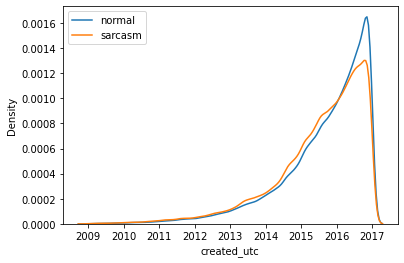

In [ ]:
sns.kdeplot(date_of_normal);
sns.kdeplot(date_of_sarcasm);
plt.legend(['normal', 'sarcasm']);
plt.show();

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'label', 'comment', 'author', 'subreddit', 'score', 'ups',
       'downs', 'date', 'created_utc', 'parent_comment'],
      dtype='object')

In [ ]:
features = train_data['comment']

In [ ]:
ps = PorterStemmer()
feature = features.apply(lambda x: x.split())
features = features.apply(lambda x : ''.join([ps.stem(word) for word in x]))

In [ ]:
features

0                                                     nc nh
1          know west teams play west teams east teams right
2         underdogs earlier today gronks announcement af...
3                       meme isnt funny new york nigga ones
4         dont pay attention long shes legal wouldnt kic...
                                ...                        
808993    im sure iran n korea technology create pigbird...
808994                                      dont vote green
808995          atheist conspiracy make christians look bad
808996                      slavs got country called kosovo
808997      values capitalism good money imprisoning people
Name: comment, Length: 808998, dtype: object

In [ ]:
tv = TfidfVectorizer(max_features = 20000000)
features1 = list(features[0:100000])
features1 = tv.fit_transform(features1).toarray()

In [ ]:
features1.shape


(10000, 13752)

In [ ]:
re.sub('[^a-zA-Z]', ' ', features[0])

'NC and NH '

In [ ]:
features[808993]

"I'm sure that Iran and N. Korea have the technology to create a pig/bird/human hybrid virus."